<b>Create Sidebar Navigation - best viewed in full screen</b>

In [1]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

# Read In Data

## Notes On Decibel Levels
- The noise raster used for applying non-standard decibel levels was downloaded from https://www.bts.gov/geospatial/national-transportation-noise-map.
- According the the documentation for the above raster (located at https://www.bts.gov/sites/bts.dot.gov/files/docs/explore-topics-and-geography/geography/203606/btsnoisemappingtooldocumentationmarch2016.pdf), the null values in the dataset are assumed to be roughly 35dB. For reference, 20dB is about the volume level of rustling leaves. Because of this, null values will be replaced with 35.0.
- The data was created over the course of 24 hours to show the approximate average decibel levels with default temperature and humidity (68°F, at 50% relative humidity), and as such is not a representation of exact decibel levels.

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read in CSV file
noise_df = pd.read_csv("../resources/in_progress/geocoded_addresses_with_decibels.csv")

# Rename decibel column (QGIS automatically adds a "1" to the end of the column name)
noise_df = noise_df.rename(columns={"decibel1": "Decibel"})

noise_df.head()

,Address,City,Zip_Code,Latitude,Longitude,Decibel
0,0 ADAMS MOUNTAIN RD,RALEIGH,27614,35.952688,-78.646766,NaN
1,0 BAILEYWICK RD,RALEIGH,27613,35.912011,-78.698080,NaN
2,0 BALLENTINE DAIRY RD,FUQUAY VARINA,27526,35.612817,-78.783274,NaN
3,0 BASS LAKE RD,HOLLY SPRINGS,27540,35.647025,-78.818525,NaN
4,0 BILLY HOPKINS RD,ZEBULON,27597,35.825658,-78.315189,61.034618


# Clean Data

In [4]:
# Replace null values with 35dB
noise_df["Decibel"] = noise_df["Decibel"].fillna(35.0)
noise_df.head()

,Address,City,Zip_Code,Latitude,Longitude,Decibel
0,0 ADAMS MOUNTAIN RD,RALEIGH,27614,35.952688,-78.646766,35.000000
1,0 BAILEYWICK RD,RALEIGH,27613,35.912011,-78.698080,35.000000
2,0 BALLENTINE DAIRY RD,FUQUAY VARINA,27526,35.612817,-78.783274,35.000000
3,0 BASS LAKE RD,HOLLY SPRINGS,27540,35.647025,-78.818525,35.000000
4,0 BILLY HOPKINS RD,ZEBULON,27597,35.825658,-78.315189,61.034618


In [5]:
# Check for remaining null values
noise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241769 entries, 0 to 241768
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Address    241769 non-null  object 
 1   City       241769 non-null  object 
 2   Zip_Code   241769 non-null  int64  
 3   Latitude   241769 non-null  float64
 4   Longitude  241769 non-null  float64
 5   Decibel    241769 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.1+ MB


# Create Decibel Scale

In [6]:
# See statistics of decibel column
noise_df["Decibel"].describe()

count    241769.000000
mean         37.263343
std           6.216446
min          35.000000
25%          35.000000
50%          35.000000
75%          35.000000
max          78.927071
Name: Decibel, dtype: float64

## Visualize data above 35dB

In [7]:
# Create dataframe of noise values above 35dB to better see distribution of higher decibel levels
above35_df = pd.DataFrame(noise_df["Decibel"])
above35_df = above35_df.loc[above35_df["Decibel"] > 35.0]
above35_df.describe()

,Decibel
count,31603.000000
mean,52.315007
std,5.917415
min,45.000072
25%,47.306164
50%,50.890648
75%,56.223175
max,78.927071


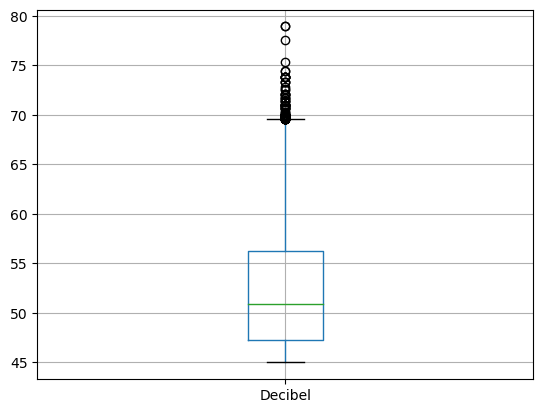

In [8]:
# Plot the values to visualize the distribution
a35plot = above35_df.boxplot()
plt.show()

## Create Decibel Scale Column
- 40dB is roughly the noise from light rain
- 50dB is roughly the noise from moderate rain
- 60dB is roughly the noise from normal conversation
- 70dB is roughly the noise from a busy office
- 80dB is roughly the noise from a lawn mower

In [9]:
# Create decibel scale column
noise_df["Decibel_Scale"] = np.where(noise_df["Decibel"] == 35.0, 1,
                                    np.where(noise_df["Decibel"] <= 47.5, 2,
                                    np.where(noise_df["Decibel"] <= 54, 3,
                                    np.where(noise_df["Decibel"] <= 60.0, 4, 5))))
noise_df["Decibel_Scale"].value_counts()

1    210166
3     12915
2      8461
4      5560
5      4667
Name: Decibel_Scale, dtype: int64

# Export to CSV

In [10]:
# Export to csv file
noise_df.to_csv("../resources/clean/noise_data_clean.csv", index=False)